# Digital PID

In [1]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt

In [2]:
# Sample time
Ts = 0.002
sTime = 0.1
t = np.arange(0, sTime, Ts)

In [3]:
# System
dt = Ts
num = [29870]
den = [1, 414.7, 33610]
G = ct.tf(num,den)
print('Process:')
print(G)
Gs = ct.sample_system(G, dt)


Process:

        2.987e+04
-------------------------
s^2 + 414.7 s + 3.361e+04



Step response:


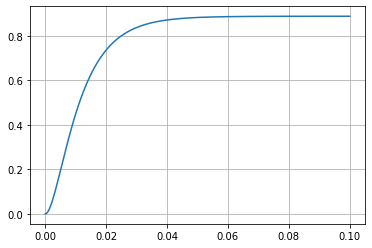

In [4]:
t1, C1 = ct.step_response(G,sTime) 

print('Step response:')
plt.plot(t1, C1)
plt.grid()
plt.show()

In [5]:
# PID controller
Kp = 3.84808815
Ti = 0.00711849
Td = 0
print(f'Kp: {Kp}, Ti: {Ti}, Td: {Td}')

# Digital PID
b0 = Kp*(1 + (Ts/(2*Ti)) + (Td/Ts))
b1 = -Kp*(1 - (Ts/(2*Ti)) + (2*Td/Ts))
b2 = Kp*Td/Ts
print(f'b0: {b0}, b1: {b1}, b2: {b2}')

num = [b0, b1, b2]
den = [1, -1, 0]
Gc = ct.tf(num, den, Ts)

print(Gc)

Kp: 3.84808815, Ti: 0.00711849, Td: 0
b0: 4.388664613547747, b1: -3.307511686452253, b2: 0.0

4.389 z^2 - 3.308 z
-------------------
      z^2 - z

dt = 0.002



Step response:


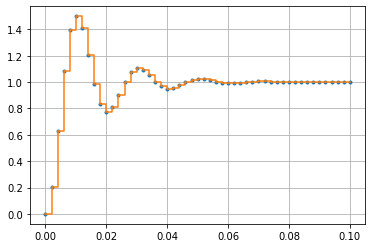

In [6]:
# PID response
sys = ct.feedback(Gc*Gs)
t2, C2 = ct.step_response(sys, sTime)

print('Step response:')
plt.plot(t2, C2,'.')
plt.step(t2,C2, where = "post")
plt.grid()
plt.show()